# Setup and Load Data

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('creditcard.csv', sep=',')
data_n = data.values

features = data.columns[1:-1]

X = data_n[:,1:-1]
y = data_n[:,-1]

if len(X.shape) == 1:
    X = X.reshape(-1,1)
if (len(y.shape) == 1):
    y = y.reshape(-1,1)

if (len(y.shape) != 2) or (len(X.shape) != 2):
    print("Error: X and y must be 2D arrays")
    exit(1)

if (X.shape[0] != y.shape[0] != data.shape[0]):
    print("Error: X and y must have the same number of rows")
    exit(1)

if (X.shape[1] != len(features)):
    print("Error: X must have the same number of columns as the number of features")
    exit(1)

if (y.shape[1] != 1):
    print("Error: y must have only one column")
    exit(1)


# Data Analysis

In [24]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Examples Count

Number of positive examples:  492
Number of negative examples:  284315
Percentage of positive examples:  0.1727485630620034
Percentage of negative examples:  99.82725143693798


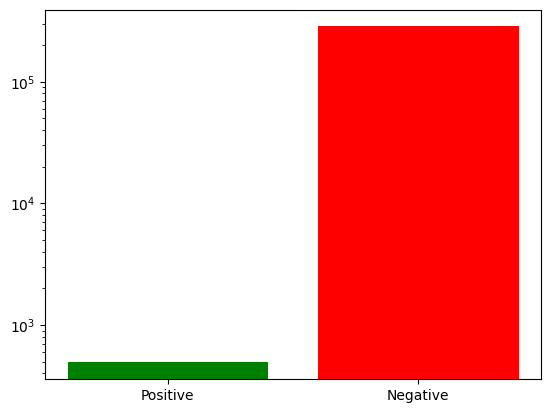

In [26]:
# Number of examples per class
posidx = np.where(y == 1)[0]
negidx = np.where(y == 0)[0]

print("Number of positive examples: ", len(posidx))
print("Number of negative examples: ", len(negidx))
plt.bar(['Positive', 'Negative'], [len(posidx), len(negidx)], color=['g', 'r'])
plt.yscale('log')  # Set y-axis to logarithmic scale
# plt.ylabel('Count (log scale)')  # Update y-axis label

print("Percentage of positive examples: ", len(posidx)/len(y)*100)
print("Percentage of negative examples: ", len(negidx)/len(y)*100)

### Data Balancing
Data balancing can be done in two ways:
1. Under-sampling: Remove some examples from the majority class.
2. Over-sampling: Add more examples to the minority class.

#### Under-Sampling

Text(0.5, 1.0, 'Under-Sampling')

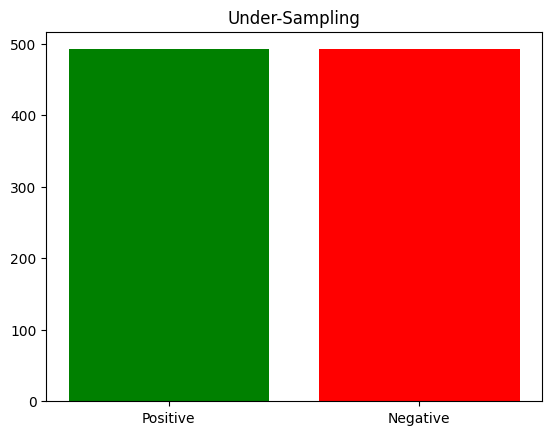

In [27]:
# Calculate the number we need to remove so that we have the same number of positive and negative examples
num_to_remove = len(negidx) - len(posidx)

# Randomly sample without replacement
negidx_downsampled = np.random.choice(negidx, size=len(posidx), replace=False)
posidx_downsampled = posidx
# Now posidx and negidx_downsampled have the same length
assert len(posidx) == len(negidx_downsampled)


plt.bar(['Positive', 'Negative'], [len(posidx_downsampled), len(negidx_downsampled)], color=['g', 'r'])
plt.title('Under-Sampling')

#### Over-Sampling

<BarContainer object of 2 artists>

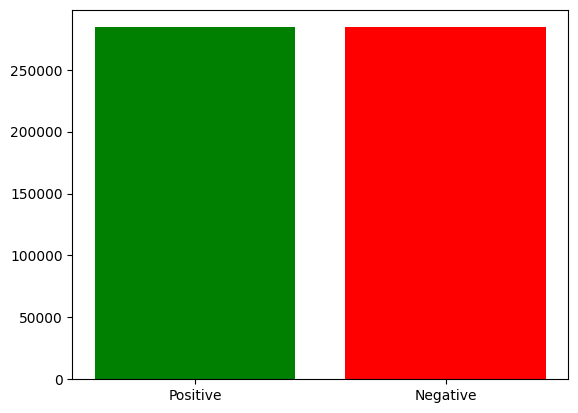

In [28]:
# Calculate the number of samples to add
num_to_add = len(negidx) - len(posidx)

# Randomly sample with replacement
posidx_oversampled = np.concatenate([posidx, np.random.choice(posidx, size=num_to_add, replace=True)])
negidx_oversampled = negidx
# Now posidx_oversampled and negidx have the same length
assert len(posidx_oversampled) == len(negidx_oversampled)

plt.bar(['Positive', 'Negative'], [len(posidx_oversampled), len(negidx_oversampled)], color=['g', 'r'])


In [30]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
